In [1]:
import sys

import pandas as pd
import numpy as np

sys.path.insert(0, "/home/jupyter/kaggle/cat_in_dat_2/kaggle_cat_in_dat_2/src")
import utility

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [2]:
DATA_DIR = '/home/jupyter/kaggle/cat_in_dat_2/kaggle_cat_in_dat_2/data/read_only'

In [3]:
train, test, submission = utility.read_files(DATA_DIR)

Loading Data...
Shape of train.csv : (600000, 25)
Shape of test.csv : (400000, 24)
Shape of sample_submission.csv : (400000, 2)
Data Loaded...


In [4]:
tables = [train, test]
table_names = ['train', 'test']
for name, table in zip(table_names, tables):
    print(f'============={name}==============')
    utility.display_head(table)
    print(utility.check_null(table))
    print(utility.check_duplicate(table, subset=table.columns))

=============train==============


,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,Bassoon,de4c57ee2,a64bc7ddf,598080a91,0256c7a4b,02e7c8990,3.0,Contributor,Hot,c,U,Pw,6.0,3.0,0
1,1,1.0,1.0,0.0,F,Y,Red,Star,Axolotl,NaN,Theremin,2bb3c3e5c,3a3a936e8,1dddb8473,52ead350c,f37df64af,3.0,Grandmaster,Warm,e,X,pE,7.0,7.0,0


Checking Null Percentage..
id        0.000000
bin_0     2.982333
bin_1     3.000500
bin_2     2.988333
bin_3     3.002333
bin_4     3.007833
nom_0     3.042000
nom_1     3.026000
nom_2     3.005833
nom_3     3.020167
nom_4     3.005833
nom_5     2.963000
nom_6     3.021833
nom_7     3.000500
nom_8     2.959167
nom_9     3.012167
ord_0     3.048000
ord_1     3.006833
ord_2     3.012500
ord_3     2.986000
ord_4     2.988333
ord_5     2.952167
day       2.992000
month     2.998000
target    0.000000
dtype: float64
Number of duplicate rows considering 25 features..
0
=============test==============


,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
0,600000,0.0,0.0,0.0,F,Y,Blue,Polygon,Axolotl,Finland,Piano,52f6dd16c,147d704e4,8d857a0a1,ca9ad1d4b,fced9e114,3.0,Novice,Boiling Hot,f,U,oU,3.0,9.0
1,600001,0.0,0.0,0.0,F,Y,Red,Circle,Lion,Russia,Bassoon,691ebeae8,8653dcc2e,67a8d4ebb,060a21580,7ca8775da,1.0,Novice,Cold,n,N,NaN,2.0,8.0


Checking Null Percentage..
id       0.00000
bin_0    2.97525
bin_1    3.00950
bin_2    2.99300
bin_3    2.98775
bin_4    2.98775
nom_0    3.01550
nom_1    2.98675
nom_2    3.04475
nom_3    3.04400
nom_4    2.99825
nom_5    2.97800
nom_6    3.00300
nom_7    3.00075
nom_8    2.98900
nom_9    3.01500
ord_0    2.97325
ord_1    3.04175
ord_2    3.02625
ord_3    3.01325
ord_4    2.98325
ord_5    3.01175
day      3.00625
month    2.99600
dtype: float64
Number of duplicate rows considering 24 features..
0


### The data contains

Data contains 
- binary features (bin_*)
- nominal features (nom_*)
- ordinal features (ord_*) 
- (potentially cyclical) day (of the week) and month features. The string ordinal features ord_{3-5} are lexically ordered according to string.ascii_letters.

<B>The string ordinal features ord_{3-5} are lexically ordered according to string.ascii_letters.</B>

<B>This data has feature interactions, as well as missing data.</B>

Is the id monotonic : True


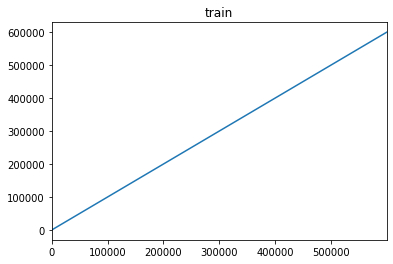

Is the id monotonic : True


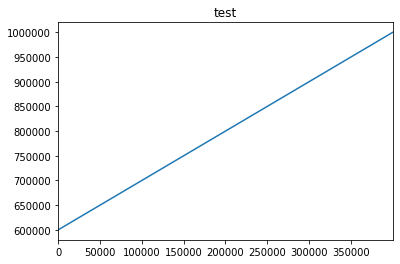

In [5]:
# Check if the id is continous or not.
for table_name, table in zip(table_names, tables):
    utility.check_id(table, 'id', data_set_name=table_name)

/home/jupyter/anaconda3/envs/py37/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



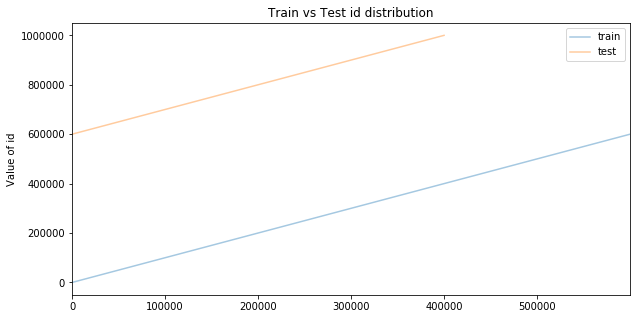

In [6]:
# Check if the id is continous or not.
utility.plot_line_train_test_overlapping(train, test, 'id')

In [7]:
test.tail()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
399995,999995,0.0,0.0,1.0,T,N,Red,Trapezoid,Axolotl,Costa Rica,Theremin,92fb4c0dc,633bdcfd0,3ef3018d3,c1a4acfaf,45a68dd2e,2.0,Expert,Warm,n,R,dp,2.0,12.0
399996,999996,0.0,0.0,0.0,F,N,Red,Polygon,Dog,Russia,Theremin,8bd03e713,7c241cd40,f74f0b894,220190c9e,e48348d66,1.0,Contributor,NaN,n,X,US,1.0,5.0
399997,999997,0.0,0.0,1.0,T,N,Red,Triangle,Hamster,NaN,Theremin,6924d999b,18d43aee8,3afd3697d,cc5495ab3,47021df0d,1.0,Grandmaster,Boiling Hot,m,P,TL,1.0,6.0
399998,999998,0.0,0.0,0.0,F,Y,Red,Circle,Dog,Costa Rica,Theremin,3e0230528,0c073adc7,3600c6e91,32b33a4b4,e4bf32721,3.0,Novice,Lava Hot,h,L,DI,2.0,11.0
399999,999999,0.0,0.0,1.0,F,N,Blue,Circle,Lion,Finland,Bassoon,0568087f1,29b2ef583,69238b544,dda9ca69e,4d921f911,3.0,Contributor,Freezing,c,N,vx,3.0,6.0


- The 'id' variable is continous for train and test
- For train it starts from 0, goes upto 599999
- For test it starts from 600K and goes upto 999999

### Get different types of features

In [8]:
train.columns

Index(['id', 'bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4', 'nom_0', 'nom_1',
       'nom_2', 'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9',
       'ord_0', 'ord_1', 'ord_2', 'ord_3', 'ord_4', 'ord_5', 'day', 'month',
       'target'],
      dtype='object')

In [9]:
nom_features = utility.get_fetaure_names(train, 'nom')
print(f'Number of nominal features {len(nom_features)}')
print(f'Nominal Features : {nom_features}')

binary_features = utility.get_fetaure_names(train, 'bin')
print(f'Number of binary features {len(binary_features)}')
print(f'Binary Features : {binary_features}')

ordinal_fetaures = utility.get_fetaure_names(train, 'ord')
print(f'Number of ordinal features {len(ordinal_fetaures)}')
print(f'Ordinal Features : {ordinal_fetaures}')

Number of nominal features 10
Nominal Features : ['nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9']
Number of binary features 5
Binary Features : ['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4']
Number of ordinal features 6
Ordinal Features : ['ord_0', 'ord_1', 'ord_2', 'ord_3', 'ord_4', 'ord_5']


- There are 10 nominal features
- There are 5 binary features
- There are 6 ordinal features
- 1 day feature
- 1 month feature
- 1 target feature

### Let's look into the target first

In [10]:
train.target.value_counts(normalize=True, dropna=False) * 100

0    81.2795
1    18.7205
Name: target, dtype: float64

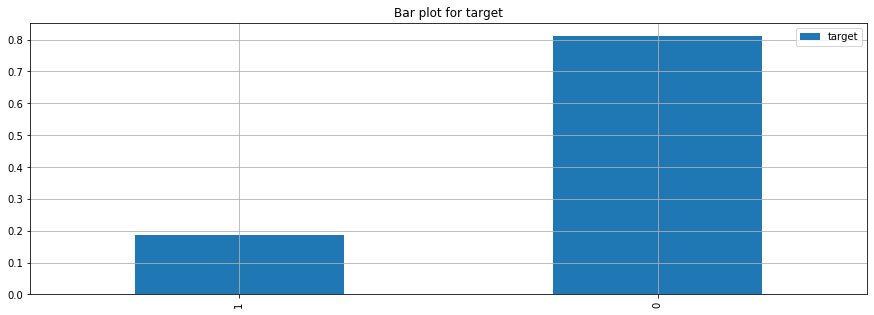

In [11]:
utility.plot_barh(train, 'target', kind='bar')

## Explore the data

In [36]:
train.shape, test.shape

((600000, 25), (400000, 24))

In [23]:
combined_df = pd.concat([train.drop('target', axis=1), test])

In [24]:
len(combined_df.columns)

24

In [25]:
# Check the number of unique values for different categorical variables
combined_df.nunique()

id       1000000
bin_0          2
bin_1          2
bin_2          2
bin_3          2
bin_4          2
nom_0          3
nom_1          6
nom_2          6
nom_3          6
nom_4          4
nom_5       1220
nom_6       1520
nom_7        222
nom_8        222
nom_9       2218
ord_0          3
ord_1          5
ord_2          6
ord_3         15
ord_4         26
ord_5        190
day            7
month         12
dtype: int64

In [35]:
# Features for which there are unseen values in train or test
diff_series = train.drop(['target'], axis=1).nunique() - test.nunique()
diff_series[diff_series != 0]

id       200000
nom_5         1
nom_6         2
nom_9         2
dtype: int64

In [29]:
# Percentage of missing values
combined_df.isna().mean() * 100

id       0.0000
bin_0    2.9795
bin_1    3.0041
bin_2    2.9902
bin_3    2.9965
bin_4    2.9998
nom_0    3.0314
nom_1    3.0103
nom_2    3.0214
nom_3    3.0297
nom_4    3.0028
nom_5    2.9690
nom_6    3.0143
nom_7    3.0006
nom_8    2.9711
nom_9    3.0133
ord_0    3.0181
ord_1    3.0208
ord_2    3.0180
ord_3    2.9969
ord_4    2.9863
ord_5    2.9760
day      2.9977
month    2.9972
dtype: float64

- There are 23 categorical variables
- train vs test : 600K vs 400K
- Following are high cardinality
    - nom_5       1220
    - nom_6       1520
    - nom_7        222
    - nom_8        222
    - nom_9       2218
    - ord_5       190
- Following variables have unseen values
    - nom_5         1
    - nom_6         2
    - nom_9         2
- There are null values for all the variables

In [39]:
# Display the unseen values of 'nom_5', 'nom_6', 'nom_9'
unseen_var_features = ['nom_5', 'nom_6', 'nom_9']
for name in unseen_var_features:
    print(f' Unseen values for {name} : {set(train[name].unique()) - set(test[name].unique())}')

 Unseen values for nom_5 : {'b3ad70fcb'}
 Unseen values for nom_6 : {'f0732a795', '3a121fefb', 'ee6983c6d'}
 Unseen values for nom_9 : {'1065f10dd', '3d19cd31d'}


### Plot the nominal features

Number of unique values in train : 3
Number of unique values in test : 3


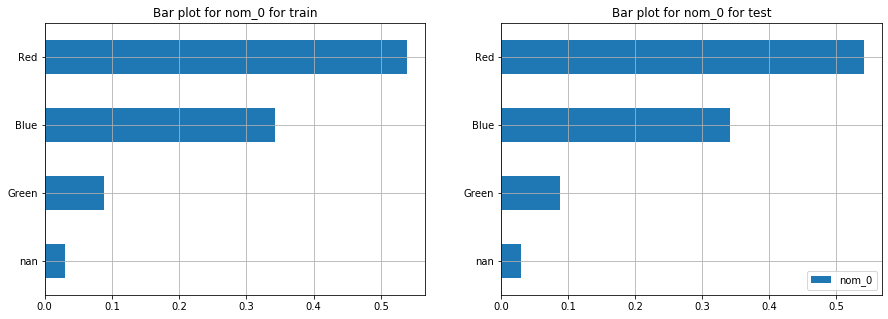

Number of unique values in train : 6
Number of unique values in test : 6


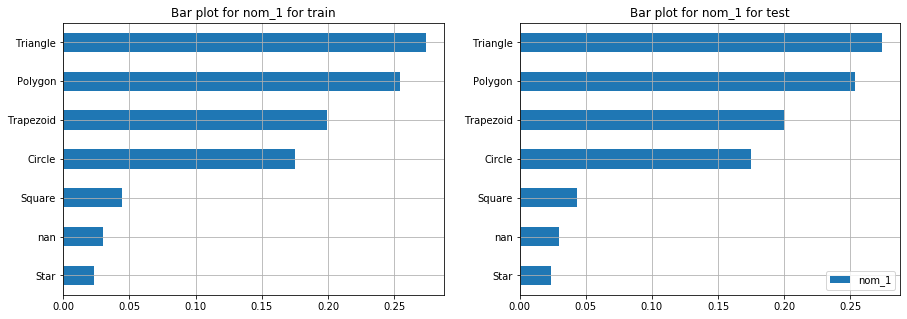

Number of unique values in train : 6
Number of unique values in test : 6


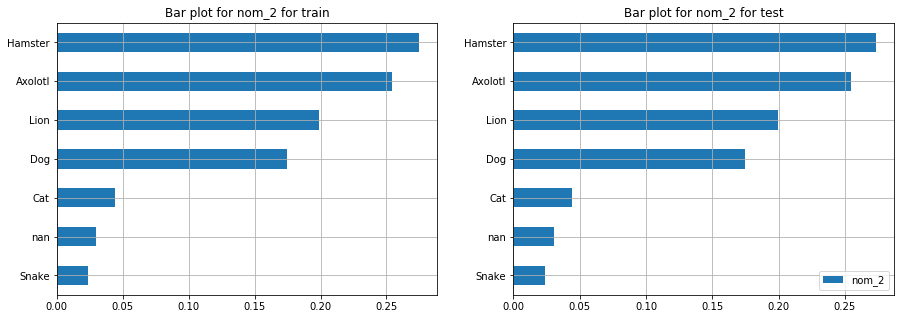

Number of unique values in train : 6
Number of unique values in test : 6


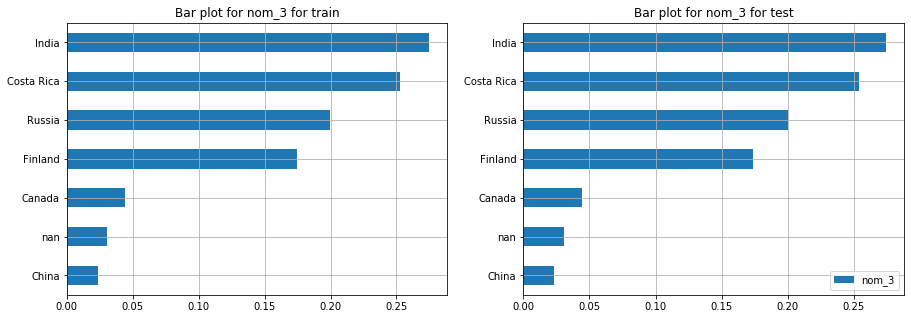

Number of unique values in train : 4
Number of unique values in test : 4


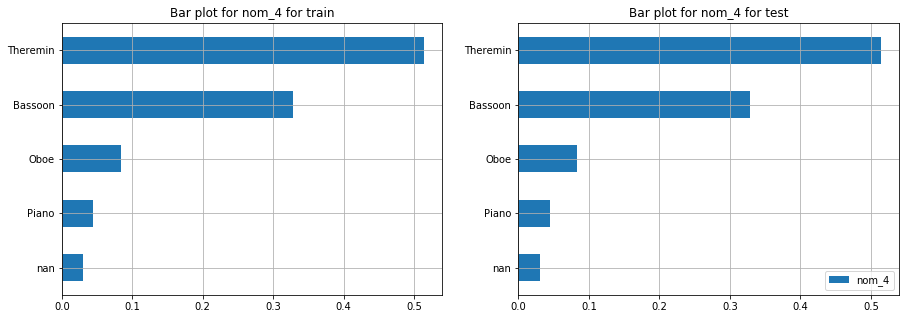

Number of unique values in train : 1220
Number of unique values in test : 1219


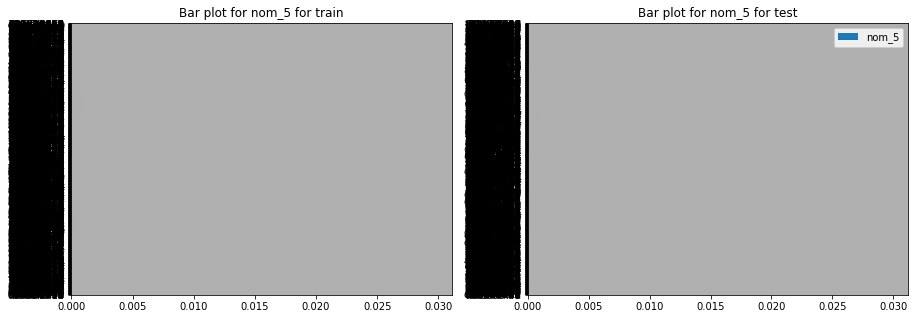

Number of unique values in train : 1519
Number of unique values in test : 1517


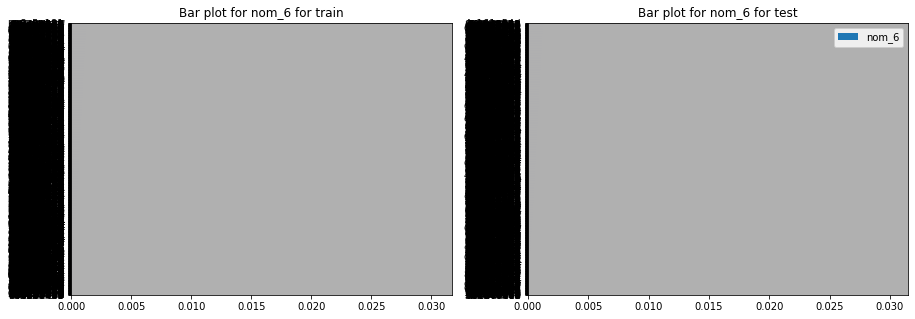

Number of unique values in train : 222
Number of unique values in test : 222


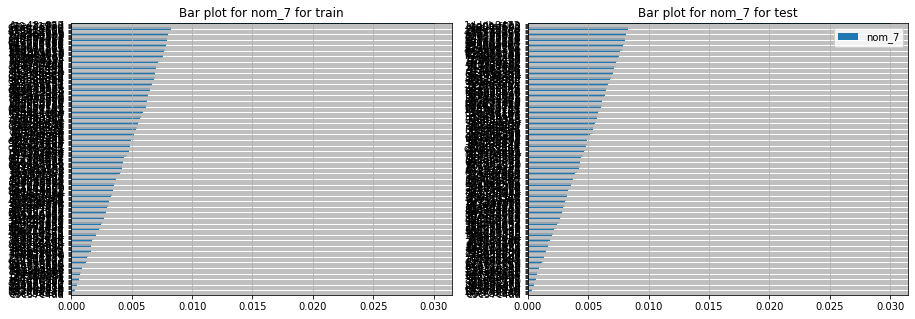

Number of unique values in train : 222
Number of unique values in test : 222


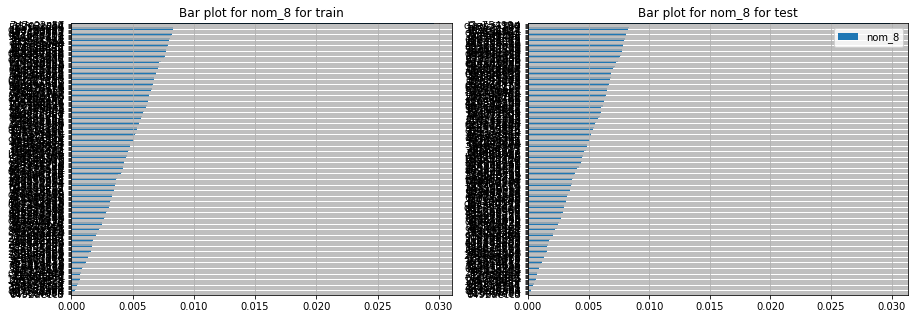

Number of unique values in train : 2218
Number of unique values in test : 2216


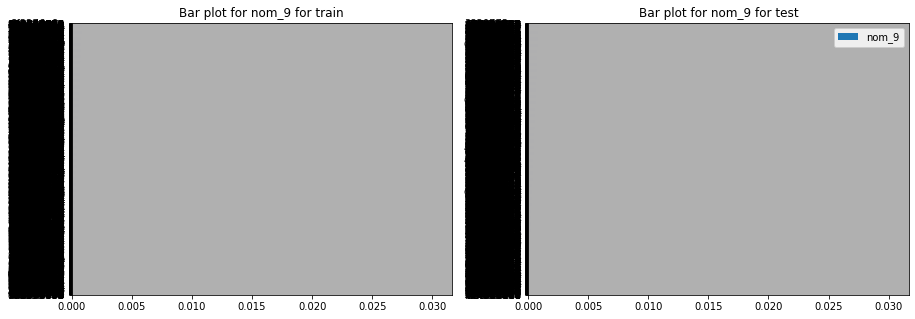

In [15]:
for name in nom_features:
    utility.plot_barh_train_test_side_by_side(train, test, name, normalize=True)

### Plot the binary features

Number of unique values in train : 2
Number of unique values in test : 2


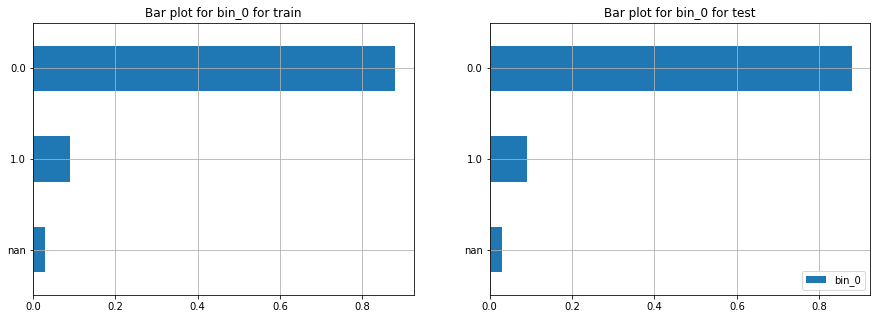

Number of unique values in train : 2
Number of unique values in test : 2


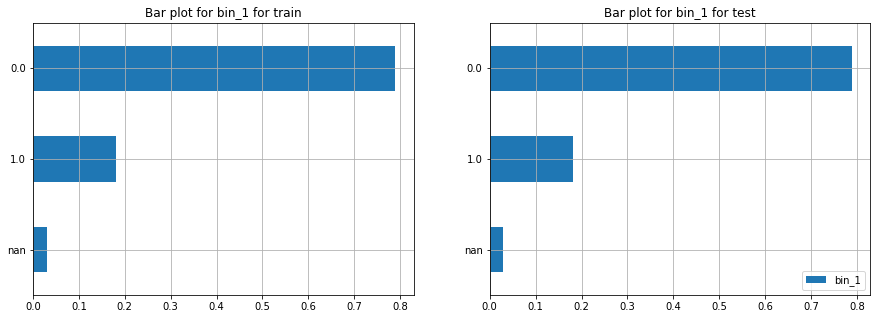

Number of unique values in train : 2
Number of unique values in test : 2


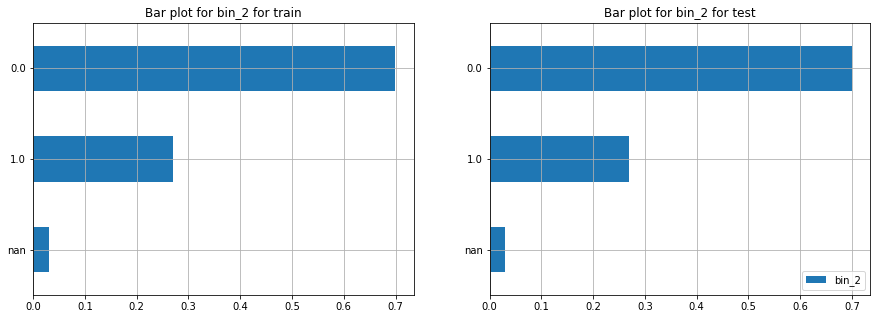

Number of unique values in train : 2
Number of unique values in test : 2


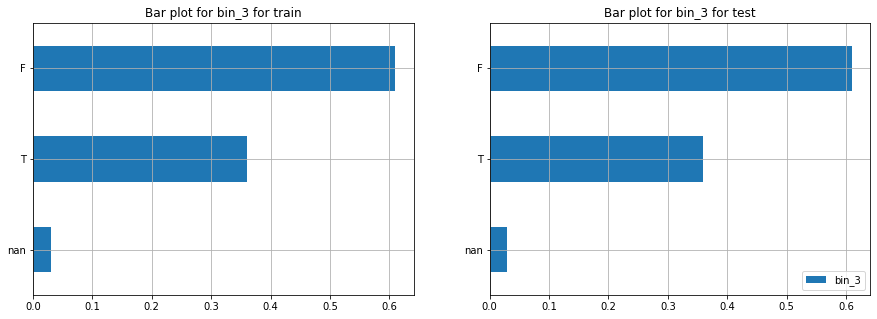

Number of unique values in train : 2
Number of unique values in test : 2


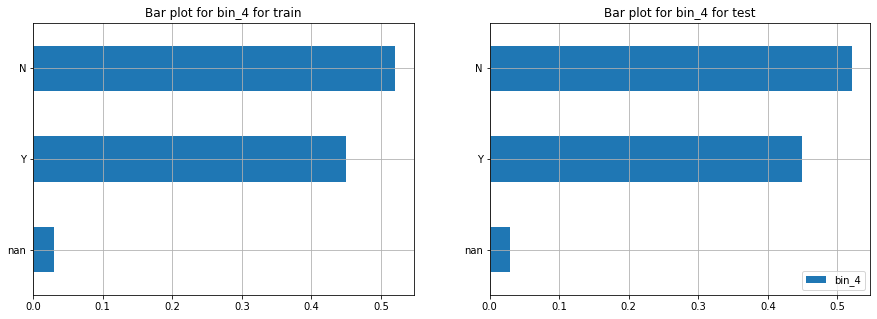

In [16]:
for name in binary_features:
    utility.plot_barh_train_test_side_by_side(train, test, name, normalize=True)

### Plot the ordinal features

Number of unique values in train : 3
Number of unique values in test : 3


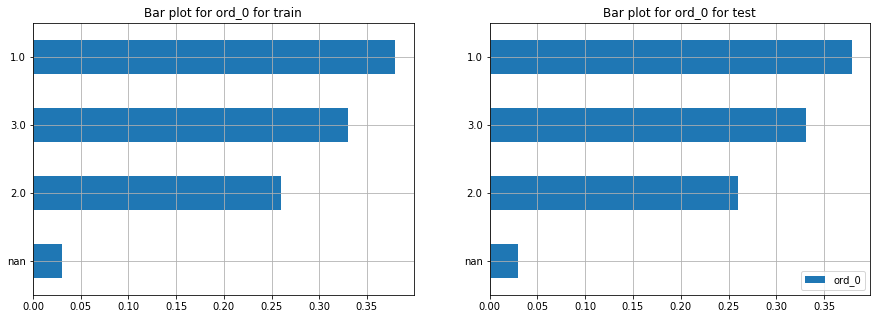

Number of unique values in train : 5
Number of unique values in test : 5


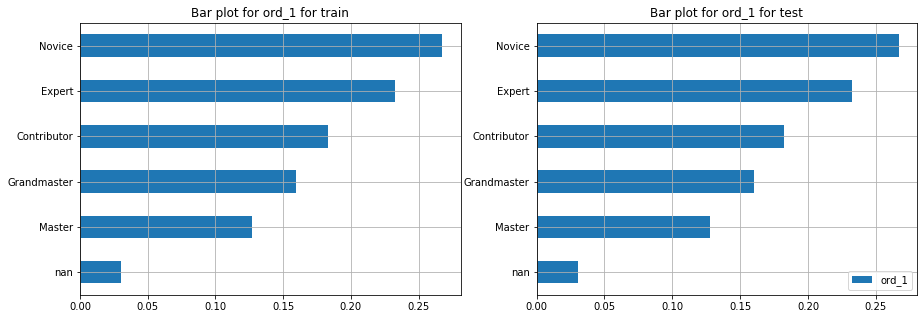

Number of unique values in train : 6
Number of unique values in test : 6


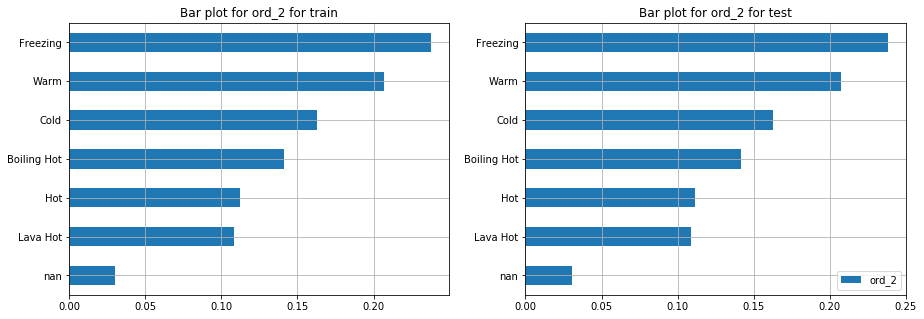

Number of unique values in train : 15
Number of unique values in test : 15


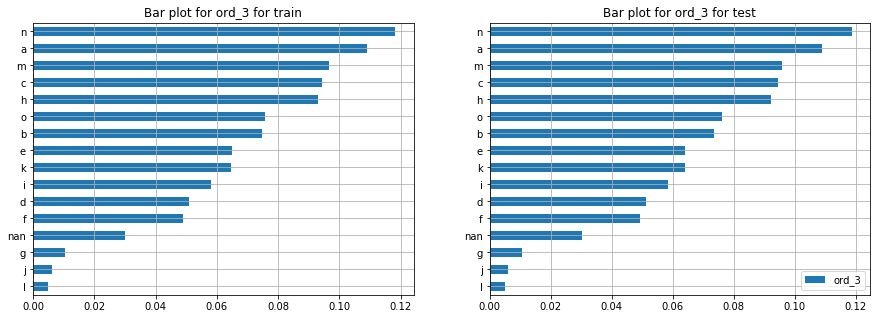

Number of unique values in train : 26
Number of unique values in test : 26


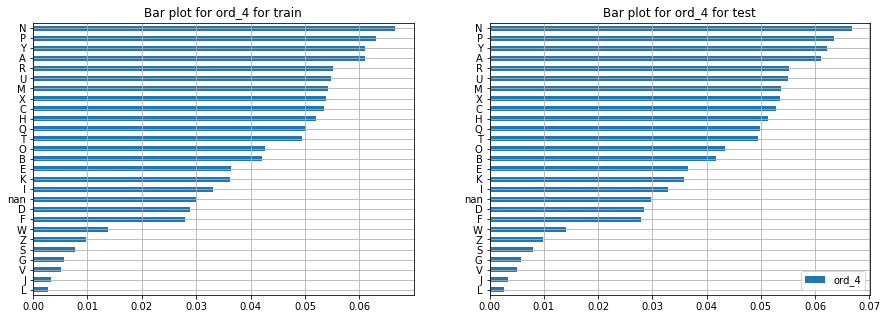

Number of unique values in train : 190
Number of unique values in test : 190


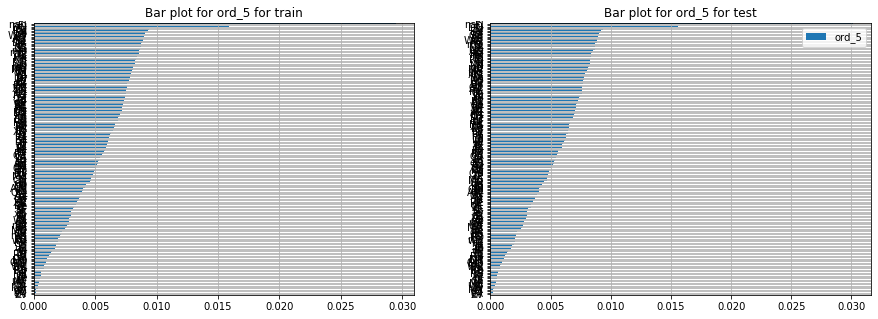

In [17]:
for name in ordinal_fetaures:
    utility.plot_barh_train_test_side_by_side(train, test, name, normalize=True)

### Plot the day feature

Number of unique values in train : 7
Number of unique values in test : 7


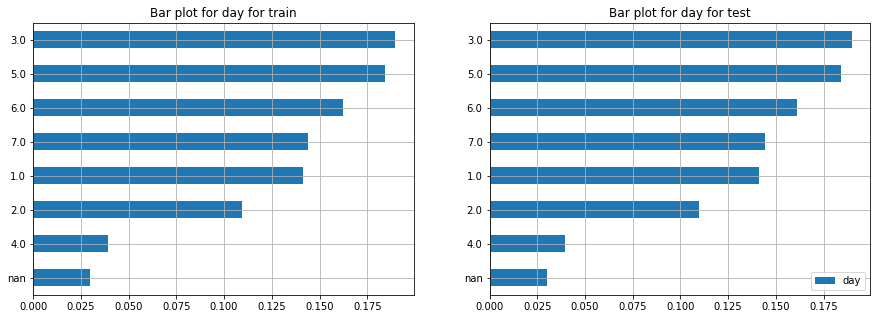

In [18]:
utility.plot_barh_train_test_side_by_side(train, test, 'day', normalize=True)

### Plot the month feature

Number of unique values in train : 12
Number of unique values in test : 12


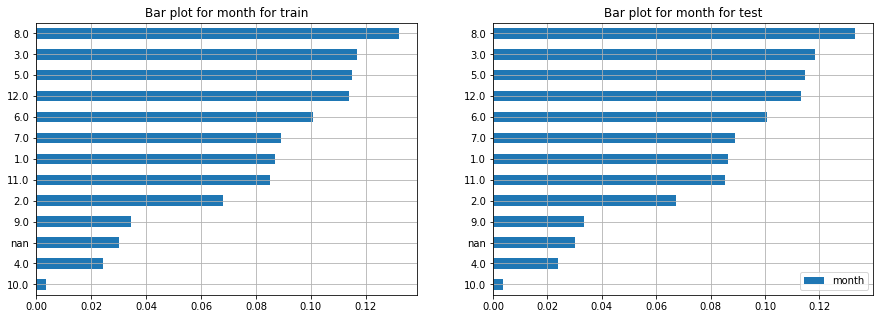

In [19]:
utility.plot_barh_train_test_side_by_side(train, test, 'month', normalize=True)

### Observations
- nom_5 has a high cardinality: 1220/1219 distinct values
- nom_6 has a high cardinality: 1519/1517 distinct values 
- nom_7 has a high cardinality: 222 distinct values
- nom_8 has a high cardinality: 222 distinct values
- nom_9 has a high cardinality: 2218/2216 distinct values

- ord_5 has a high cardinality: 190 distinct values 

- Correlation plots (from the profiling) are little interesting. Train shows some correlation, but test does not????